Para uma visão mais detalhada e aprofundada, considere [scikit-learn: machine learning in Python](http://www.scipy-lectures.org/packages/scikit-learn/index.html), escrito por Gael Varoquaux, e [An introduction to machine learning with scikit-learn](http://scikit-learn.org/stable/tutorial/basic/tutorial.html), parte da documentação oficial da Scikit-learn.

# Scikit-learn

## Introdução

* Há um conjunto de técnicas de **aprendizado** e **inferência** que inclui
    * Regressão Linear
    * Regressão Logística
    * Clustering (diversos algoritmos)
    * Máquinas de vetores de suporte
    * Processos Gaussianos
    * PCA/LDA
    * etc.

* Tais técnicas apresentam nomes diferentes em comunidades diferentes
    * Cientistas da Computação e engenheiros chamam de **aprendizado de máquina**
    * Economistas chamam de **econometria**
    * Estatísticos de **aprendizado estatístico de padrões**
    * Bioinformatas de **bioestatística**

### Qual é a tarefa em questão?

* Essas técnicas tentam resolver um **problema de aprendizado**: dadas **n amostras** de dados, **predizer** as propriedades de dados não observados

* Problemas de aprendizado são geralmente dividos em 2 casos:

    * **Aprendizado supervisionado** - no qual as amostras apresentam informação extra sobre a propriedade a ser prevista
        * Regressão - a propriedade a ser prevista é um valor contínuo
            * *Exemplo* - o *preço* de uma casa a partir de dados de localização, cômodos, vizinhança, etc.
        * Classificação - a propriedade a ser prevista é uma classe/categoria
            * *Exemplo* - classificar *e-mail* como SPAM/HAM a partir de seu conteúdo

    * **Aprendizado não-supervisionado** - no qual as amostras não apresentam informação extra, ou seja, desejamos buscar alguma **estrutura** nesses dados (aglomerar dados semelhantes e/ou determinar a distribuição de probabilidade que gerou tais dados)

#### Exemplo

In [1]:
# Importa o módulo de plotagem
import matplotlib.pyplot as plt

# Configura a matplotlib para operar interativamente no notebook. Para detalhes, execute:
# %matplotlib?
%matplotlib inline

# Configura o tamanho padrão da figura largura X altura, em polegadas
plt.rcParams['figure.figsize'] = (10, 8)

In [2]:
# Apenas para evitar problemas de visualização nos slides. NÃO use isto de forma regular!
import warnings
warnings.filterwarnings('ignore')

### Scikit-learn (ou Sklearn)

* Scikit-learn é um pacote de software para aprendizado de máquina em **Python**
* Desenvolvida sobre a *pilha de software* SciPy
* Seu desenvolvimento é liderado por pesquisadores do INRIA (França)

#### Aprendizado supervisionado na Sklearn

- Nearest Neighbors
- Support Vector Machines (SVM)
    - Linear Support
    - Radial Basis Function (RGB) kernel SVM
- Decision Trees
- Ensemble
    - Random Forests
    - AdaBoost
- Linear Discriminant Analysis
- Gaussian Processes

In [3]:
# Code source: Gaël Varoquaux
#              Andreas Müller
# Modified for documentation by Jaques Grobler
# Modified for this course by Thiago Santos
# License: BSD 3 clause

import numpy as np
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA

def classifier_showroom(names, classifiers):

    h = .02  # step size in the mesh

    X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
    rng = np.random.RandomState(2)
    X += 2 * rng.uniform(size=X.shape)
    linearly_separable = (X, y)

    datasets = [make_moons(noise=0.3, random_state=0),
                make_circles(noise=0.2, factor=0.5, random_state=1),
                linearly_separable
                ]

    figure = plt.figure(figsize=(12, 8))
    i = 1
    # iterate over datasets
    for ds in datasets:
        # preprocess dataset, split into training and test part
        X, y = ds
        X = StandardScaler().fit_transform(X)
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4)

        x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
        y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                             np.arange(y_min, y_max, h))

        # just plot the dataset first
        cm = plt.cm.RdBu
        cm_bright = ListedColormap(['#FF0000', '#0000FF'])
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        # Plot the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
        # and testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6)
        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        i += 1

        # iterate over classifiers
        for name, clf in zip(names, classifiers):
            ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
            clf.fit(X_train, y_train)
            score = clf.score(X_test, y_test)

            # Plot the decision boundary. For that, we will assign a color to each
            # point in the mesh [x_min, m_max]x[y_min, y_max].
            if hasattr(clf, "decision_function"):
                Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
            else:
                Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

            # Put the result into a color plot
            Z = Z.reshape(xx.shape)
            ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)
            if hasattr(clf, "decision_function"):
                ax.contour(xx, yy, Z, [0.0], colors='k', linestyles=['solid'])
            else:
                ax.contour(xx, yy, Z, [0.5], colors='k', linestyles=['solid'])

            # Plot also the training points
            ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
            # and testing points
            ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                       alpha=0.6)

            ax.set_xlim(xx.min(), xx.max())
            ax.set_ylim(yy.min(), yy.max())
            ax.set_xticks(())
            ax.set_yticks(())
            ax.set_title(name)
            ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                    size=15, horizontalalignment='right')
            i += 1

    figure.subplots_adjust(left=.02, right=.98)

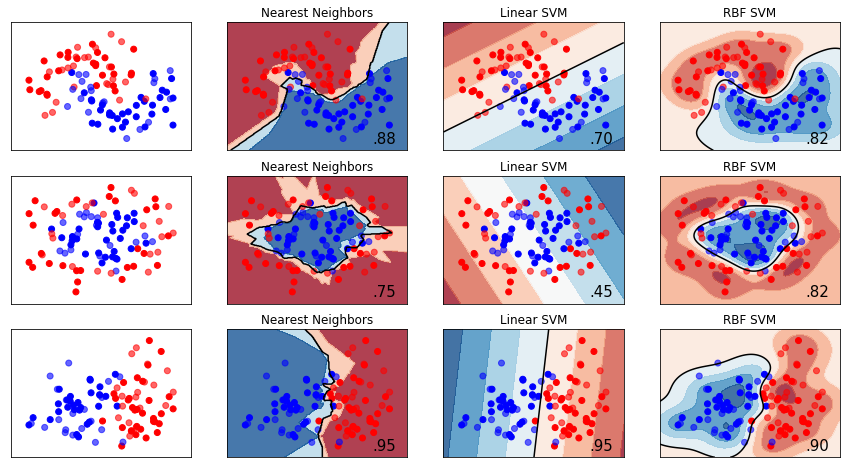

In [4]:
names = ["Nearest Neighbors", "Linear SVM", "RBF SVM"]
classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1)]

classifier_showroom(names, classifiers)

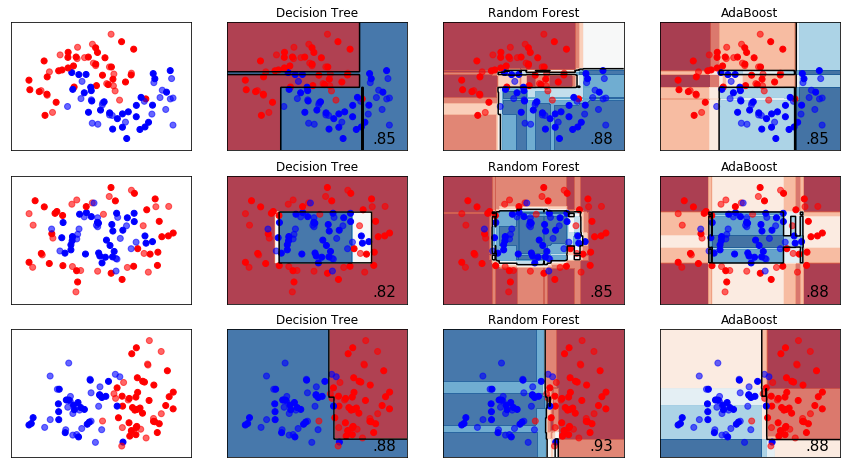

In [5]:
names = ["Decision Tree", "Random Forest", "AdaBoost"]
classifiers = [
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    AdaBoostClassifier()]
classifier_showroom(names, classifiers)

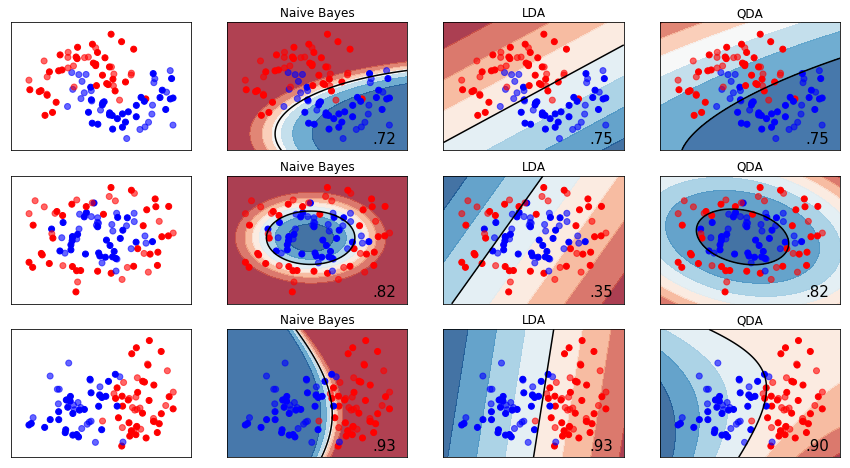

In [6]:
names = ["Naive Bayes", "LDA", "QDA"]
classifiers = [
    GaussianNB(),
    LDA(),
    QDA()]

classifier_showroom(names, classifiers)

#### Aprendizado não-supervisionado na Sklearn

- Gaussian mixture models
- Clustering
    - Affinity propagation
    - Mean-shift
    - Spectral clustering
    - Hierarchical clustering
    - DBSCAN
- Neural Networks (unsupervised)
    - Restricted Boltzmann machines

In [7]:
def clustering_showroom():

    import time

    import numpy as np
    import matplotlib.pyplot as plt

    from sklearn import cluster, datasets
    from sklearn.metrics import euclidean_distances
    from sklearn.neighbors import kneighbors_graph
    from sklearn.preprocessing import StandardScaler

    np.random.seed(0)

    # Generate datasets. We choose the size big enough to see the scalability
    # of the algorithms, but not too big to avoid too long running times
    n_samples = 1500
    noisy_circles = datasets.make_circles(n_samples=n_samples, factor=.5,
                                          noise=.05)
    noisy_moons = datasets.make_moons(n_samples=n_samples, noise=.05)
    blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)
    no_structure = np.random.rand(n_samples, 2), None

    colors = np.array([x for x in 'bgrcmykbgrcmykbgrcmykbgrcmyk'])
    colors = np.hstack([colors] * 20)

    plt.figure(figsize=(17, 9.5))
    plt.subplots_adjust(left=.001, right=.999, bottom=.001, top=.96, wspace=.05,
                        hspace=.01)

    plot_num = 1
    for i_dataset, dataset in enumerate([noisy_circles, noisy_moons, blobs,
                                         no_structure]):
        X, y = dataset
        # normalize dataset for easier parameter selection
        X = StandardScaler().fit_transform(X)

        # estimate bandwidth for mean shift
        bandwidth = cluster.estimate_bandwidth(X, quantile=0.3)

        # connectivity matrix for structured Ward
        connectivity = kneighbors_graph(X, n_neighbors=10)
        # make connectivity symmetric
        connectivity = 0.5 * (connectivity + connectivity.T)

        # Compute distances
        #distances = np.exp(-euclidean_distances(X))
        distances = euclidean_distances(X)

        # create clustering estimators
        ms = cluster.MeanShift(bandwidth=bandwidth, bin_seeding=True)
        two_means = cluster.MiniBatchKMeans(n_clusters=2)
        ward = cluster.AgglomerativeClustering(n_clusters=2,
                        linkage='ward', connectivity=connectivity)
        spectral = cluster.SpectralClustering(n_clusters=2,
                                              eigen_solver='arpack',
                                              affinity="nearest_neighbors")
        dbscan = cluster.DBSCAN(eps=.2)
        affinity_propagation = cluster.AffinityPropagation(damping=.9,
                                                           preference=-200)

        average_linkage = cluster.AgglomerativeClustering(linkage="average",
                                affinity="cityblock", n_clusters=2,
                                connectivity=connectivity)

        for name, algorithm in [
                                ('MiniBatchKMeans', two_means),
                                ('AffinityPropagation', affinity_propagation),
                                ('MeanShift', ms),
                                ('SpectralClustering', spectral),
                                ('Ward', ward),
                                ('AgglomerativeClustering', average_linkage),
                                ('DBSCAN', dbscan)
                               ]:
            # predict cluster memberships
            t0 = time.time()
            algorithm.fit(X)
            t1 = time.time()
            if hasattr(algorithm, 'labels_'):
                y_pred = algorithm.labels_.astype(np.int)
            else:
                y_pred = algorithm.predict(X)

            # plot
            plt.subplot(4, 7, plot_num)
            if i_dataset == 0:
                plt.title(name, size=18)
            plt.scatter(X[:, 0], X[:, 1], color=colors[y_pred].tolist(), s=10)

            if hasattr(algorithm, 'cluster_centers_'):
                centers = algorithm.cluster_centers_
                center_colors = colors[:len(centers)]
                plt.scatter(centers[:, 0], centers[:, 1], s=100, c=center_colors)
            plt.xlim(-2, 2)
            plt.ylim(-2, 2)
            plt.xticks(())
            plt.yticks(())
            plt.text(.99, .01, ('%.2fs' % (t1 - t0)).lstrip('0'),
                     transform=plt.gca().transAxes, size=15,
                     horizontalalignment='right')
            plot_num += 1

    plt.show()

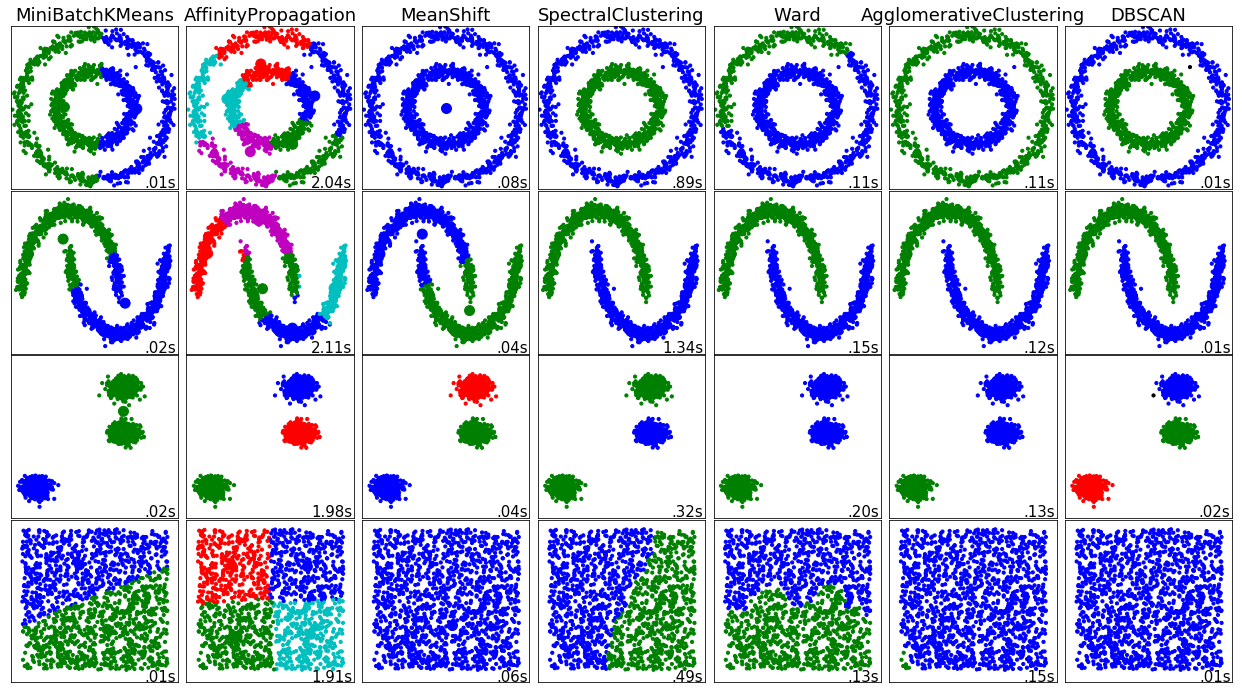

In [8]:
clustering_showroom()

#### Fit/Predict

- Na Sklearn, os algoritmos são representados por objetos (POO)
- Tais objetos implementam uma **interface fit/predict**
- `fit`
    - realiza a etapa de **aprendizado**
- `predict`
    - realiza as etapas de regressão ou classificação
- O **modelo** aprendido pode ser armazenado em disco utilizando o módulo de persistência `pickle`

### Instalação da Sklearn

- Usuários Windows e Mac deveriam considerar a [distribuição Anaconda](https://store.continuum.io/cshop/anaconda/) da Continuum Analytics

- Usuários Linux podem utilizar o gerenciador de pacotes de sua distribuição
    - *Exemplo*: usuários Debian/Ubuntu podem utilizar
            $ sudo apt-get install python-sklearn

- Usuários de todos os sistemas podem utilizar o `pip`
        $ pip install scikit-learn

- [Instruções detalhadas de instalação](http://scikit-learn.org/stable/install.html) podem ser vistas no site oficial da Sklearn.